<div align='center'>
    <h1>Tugas Onsite Modul 5</h1>
    <h3>Teguh Ryan IF-03-02 1203230044</h3>
</div>

No.1

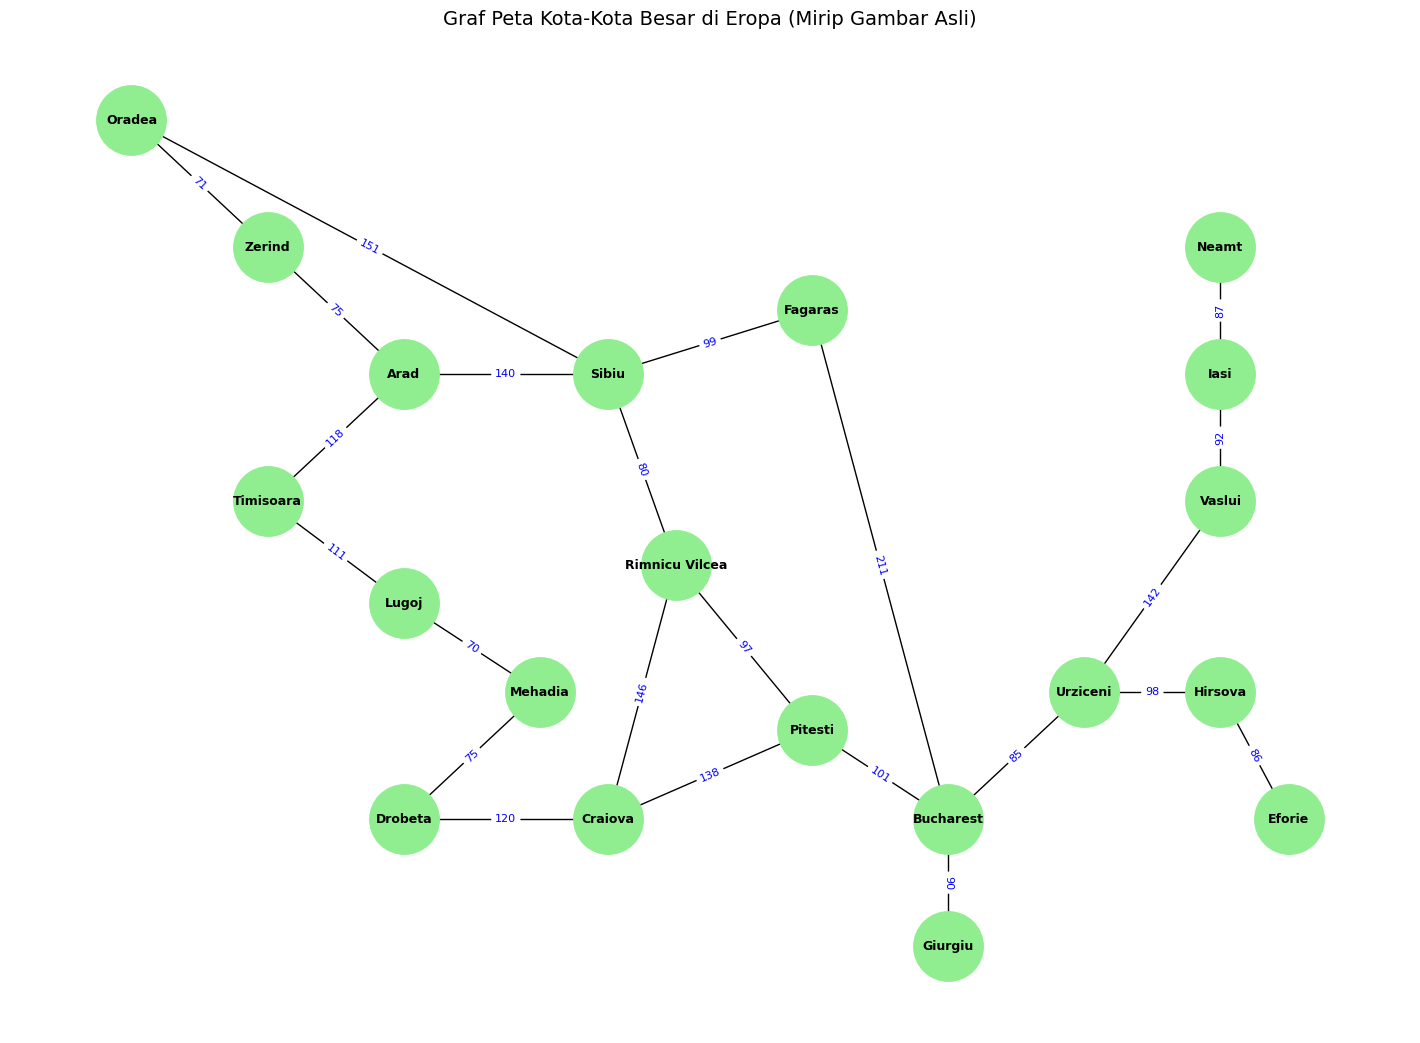

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Buat graph
G = nx.Graph()

# Tambahkan edges dan jaraknya (sesuai gambar)
edges = [
    ("Oradea", "Zerind", 71),
    ("Zerind", "Arad", 75),
    ("Arad", "Sibiu", 140),
    ("Arad", "Timisoara", 118),
    ("Timisoara", "Lugoj", 111),
    ("Lugoj", "Mehadia", 70),
    ("Mehadia", "Drobeta", 75),
    ("Drobeta", "Craiova", 120),
    ("Craiova", "Rimnicu Vilcea", 146),
    ("Craiova", "Pitesti", 138),
    ("Rimnicu Vilcea", "Sibiu", 80),
    ("Rimnicu Vilcea", "Pitesti", 97),
    ("Sibiu", "Fagaras", 99),
    ("Fagaras", "Bucharest", 211),
    ("Pitesti", "Bucharest", 101),
    ("Bucharest", "Giurgiu", 90),
    ("Bucharest", "Urziceni", 85),
    ("Urziceni", "Hirsova", 98),
    ("Hirsova", "Eforie", 86),
    ("Urziceni", "Vaslui", 142),
    ("Vaslui", "Iasi", 92),
    ("Iasi", "Neamt", 87),
    ("Sibiu", "Oradea", 151)
]

for u, v, w in edges:
    G.add_edge(u, v, weight=w)

# Posisi setiap kota dibuat semirip mungkin dengan peta pada gambar
pos = {
    "Oradea": (1, 8),
    "Zerind": (2, 7),
    "Arad": (3, 6),
    "Timisoara": (2, 5),
    "Lugoj": (3, 4.2),
    "Mehadia": (4, 3.5),
    "Drobeta": (3, 2.5),
    "Craiova": (4.5, 2.5),
    "Rimnicu Vilcea": (5, 4.5),
    "Pitesti": (6, 3.2),
    "Sibiu": (4.5, 6),
    "Fagaras": (6, 6.5),
    "Bucharest": (7, 2.5),
    "Giurgiu": (7, 1.5),
    "Urziceni": (8, 3.5),
    "Hirsova": (9, 3.5),
    "Eforie": (9.5, 2.5),
    "Vaslui": (9, 5),
    "Iasi": (9, 6),
    "Neamt": (9, 7),
}

# Gambar graf
plt.figure(figsize=(14, 10))
nx.draw(G, pos, with_labels=True, node_size=2500, node_color="lightgreen", font_size=9, font_weight="bold")
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='blue', font_size=8)

plt.title("Graf Peta Kota-Kota Besar di Eropa (Mirip Gambar Asli)", fontsize=14)
plt.axis('off')
plt.show()

No.2

Jalur BFS dari Bandung ke Surakarta:
Bandung -> Yogyakarta -> Surakarta


C:\Users\Ryan\AppData\Local\Temp\ipykernel_21148\430406378.py:96: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


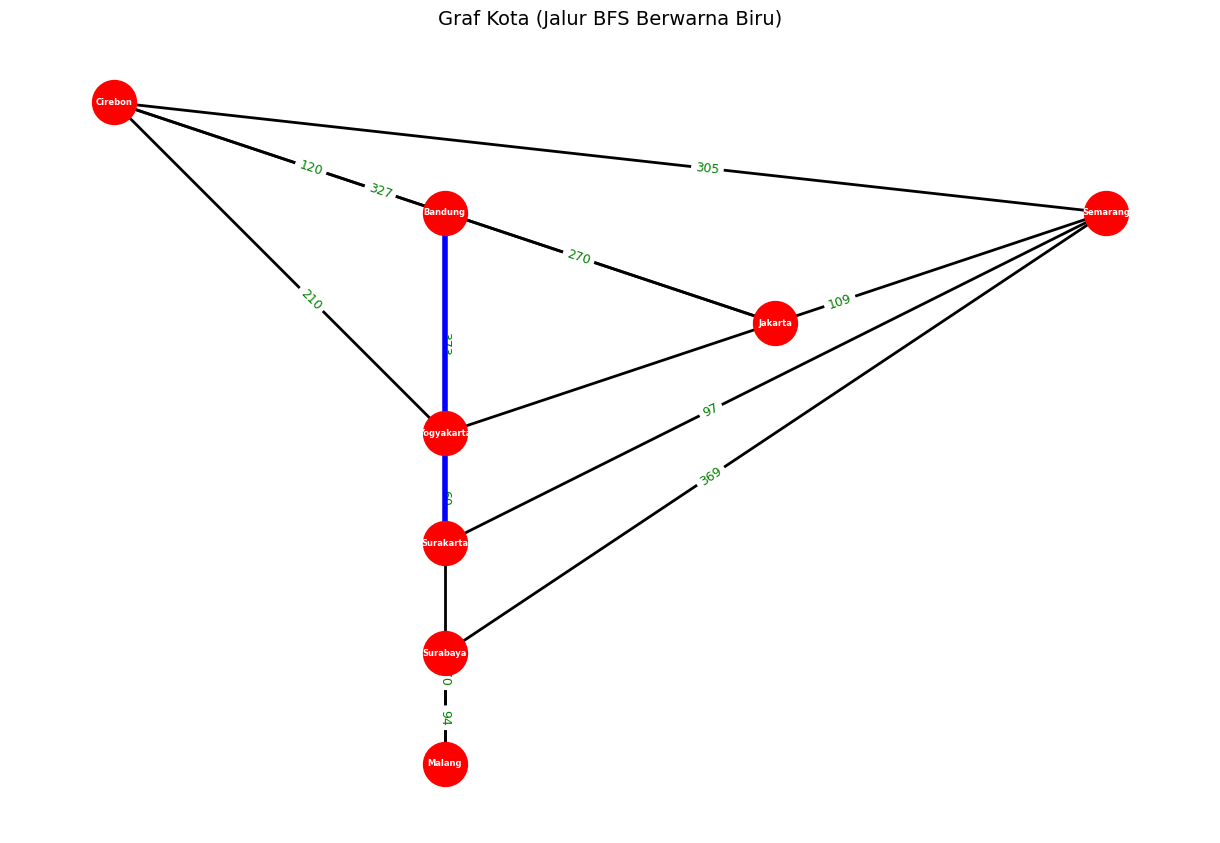

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

# Inisialisasi graf
G = nx.Graph()

# Menambahkan edge dan bobot jarak antar kota
edges = [
    ('Jakarta', 'Cirebon', 327),
    ('Jakarta', 'Bandung', 270),
    ('Cirebon', 'Bandung', 120),
    ('Cirebon', 'Yogyakarta', 210),
    ('Cirebon', 'Semarang', 305),
    ('Bandung', 'Yogyakarta', 373),
    ('Semarang', 'Yogyakarta', 109),
    ('Semarang', 'Surakarta', 97),
    ('Semarang', 'Surabaya', 369),
    ('Surabaya', 'Malang', 94),
    ('Surakarta', 'Malang', 370),
    ('Surakarta', 'Yogyakarta', 60),
]
G.add_weighted_edges_from(edges)

# Posisi manual sesuai layout dari peta
pos = {
    'Jakarta': (0, 0),
    'Bandung': (-1, 1),
    'Cirebon': (-2, 2),
    'Semarang': (1, 1),
    'Yogyakarta': (-1, -1),
    'Surakarta': (-1, -2),
    'Surabaya': (-1, -3),
    'Malang': (-1, -4),
}

# Fungsi BFS
def bfs(graph, start, goal):
    visited = set()
    queue = deque([(start, [start])])  # (kota_sekarang, path_sampai_sini)

    while queue:
        current, path = queue.popleft()
        if current == goal:
            return path

        visited.add(current)

        for neighbor in graph.neighbors(current):
            if neighbor not in visited:
                queue.append((neighbor, path + [neighbor]))
                visited.add(neighbor)
    
    return None  # Tidak ditemukan

# Jalankan BFS
start_city = "Bandung"
goal_city = "Surakarta"
path_result = bfs(G, start_city, goal_city)

# Gambar graf
plt.figure(figsize=(12, 8))
nx.draw(
    G, pos,
    with_labels=True,
    node_color='red',
    edge_color='black',
    node_size=1000,
    font_color='white',
    font_size=6,
    font_weight='bold',
    width=2
)

# Tambahkan label bobot di atas edge
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_color='green',
    font_size=9,
    label_pos=0.6
)

# Highlight jalur hasil BFS
if path_result:
    edge_path = list(zip(path_result, path_result[1:]))  # Buat pasangan edge dari path
    nx.draw_networkx_edges(G, pos, edgelist=edge_path, edge_color='blue', width=4)
    print(f"Jalur BFS dari {start_city} ke {goal_city}:")
    print(" -> ".join(path_result))
else:
    print("Jalur tidak ditemukan.")

plt.title("Graf Kota (Jalur BFS Berwarna Biru)", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()